In [1]:
import pandas as pd
import numpy as np

# from seaborn import apionly as sns
from matplotlib import pyplot as plt

In [2]:
no_wind = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/weights_03031044.csv", index_col = 0)
no_t2m = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/weights_09031802.csv")
no_t2m_2 = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/weights_13031648.csv")
no_ywind = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/weights_05031508.csv", index_col = 0)
no_xwind = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/weights_05031824.csv", index_col = 0)
no_lsmask = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/weights_06031337.csv", index_col = 0)
no_trend = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/weights_06031648.csv", index_col = 0)
no_sic = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/weights_07031244.csv", index_col = 0)
no_arome = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/weights_09031539.csv", index_col = 0)
bench = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/weights_21021550.csv", index_col = 0)
persistence = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/persistence.csv", index_col = 0)


In [3]:
print(no_t2m['NIIEE_2'].mean())
print(no_t2m_2['NIIEE_2'].mean())
print(no_wind['NIIEE_2'].mean())
print(no_ywind['NIIEE_2'].mean())
print(no_xwind['NIIEE_2'].mean())
print(no_lsmask['NIIEE_2'].mean())
print(no_trend['NIIEE_2'].mean())
print(no_sic['NIIEE_2'].mean())
print(no_arome['NIIEE_2'].mean())
print(bench['NIIEE_2'].mean())
print(persistence['NIIEE_2'].mean())

27.540560440943526
28.094018416631574
32.34445771810676
29.713826564147276
29.864900304488685
29.298746784562844
28.441965304973408
66.10773162901651
37.82832121265299
28.194607339350515
34.906242663118725


In [4]:
NIIEEs = [no_t2m['NIIEE_2'].mean(), no_arome['NIIEE_2'].mean(), no_wind['NIIEE_2'].mean(), no_ywind['NIIEE_2'].mean(), no_xwind['NIIEE_2'].mean(), no_lsmask['NIIEE_2'].mean(), no_trend['NIIEE_2'].mean(), no_sic['NIIEE_2'].mean()]
NIIEEs_2 = [no_t2m_2['NIIEE_2'].mean(), no_arome['NIIEE_2'].mean(), no_wind['NIIEE_2'].mean(), no_ywind['NIIEE_2'].mean(), no_xwind['NIIEE_2'].mean(), no_lsmask['NIIEE_2'].mean(), no_trend['NIIEE_2'].mean(), no_sic['NIIEE_2'].mean()]

tick_labels = ['t2m', 'arome', 'winds', 'ywind', 'xwind', 'lsmask', 'trend', 'sic']

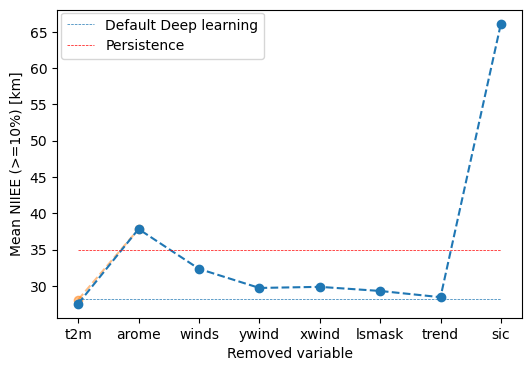

In [18]:
fig, ax = plt.subplots(figsize = (6,4))

ax.plot(NIIEEs_2[:2], '--o', c='#ff7f0e', alpha = .5)
ax.plot(NIIEEs, '--o')



ax.hlines(bench['NIIEE_2'].mean(), ls = 'dashed', xmin = 0, xmax = 7, linewidth = .5,  label='Default Deep learning')

ax.hlines(persistence['NIIEE_2'].mean(), color = 'red', ls = 'dashed', xmin = 0, xmax = 7, linewidth = .5,  label='Persistence')

ax.set_xticks(np.arange(8), tick_labels)

ax.set_xlabel('Removed variable')
ax.set_ylabel('Mean NIIEE (>=10%) [km]')

fig.legend(loc = 'upper left', bbox_to_anchor= (0.12, 0.89))

fig.savefig('/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/Forecasts/leave_one_out.pdf')